# Defining the dataset

These exercises show how to load and structure a dataset object.

In [58]:
# relevant imports
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import pyrsa
import pyrsa.data as rsd # abbreviation to deal with dataset

This first example will use a dataset with 92 different visual stimuli as conditions to which brain responses are measured.

In [59]:
# import the measurements for the dataset
measurements = io.matlab.loadmat('92imageData/simTruePatterns.mat')
measurements = measurements['simTruePatterns']
nCond = measurements.shape[0]
nVox = measurements.shape[1]

Text(0.5,1,'Measurements')

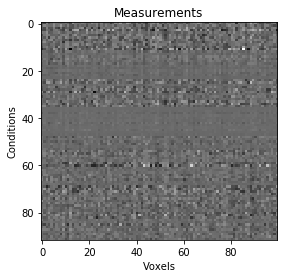

In [60]:
# plot the imported data
plt.imshow(measurements,cmap='gray') 
plt.xlabel('Voxels')
plt.ylabel('Conditions')
plt.title('Measurements')

In [61]:
# now create a  dataset object
des = {'session': 1, 'subj': 1}
obs_des = {'conds': np.array(['cond_' + str(x) for x in np.arange(nCond)])}
chn_des = {'voxels': np.array(['voxel_' + str(x) for x in np.arange(nVox)])}
#obs_des = {'conds': np.array(['cond_' + str(x) for x in np.arange(1,nCond+1)])} # indices from 1
#chn_des = {'conds': np.array(['voxel' + str(x) for x in np.arange(1,nVox+1)])} # indices from 1
data = rsd.Dataset(measurements=measurements,
                           descriptors=des,
                           obs_descriptors=obs_des,
                           channel_descriptors=chn_des)
print(data)

pyrsa.data.Dataset
measurements = 
[[-2.28467120e+16 -2.89393925e+16  1.98175667e+16 -1.52670137e+16
   6.16739860e+14  2.10873889e+16  7.54719220e+15  3.91406464e+15
   2.06459753e+15  1.71183930e+15  9.25183442e+15  6.25203471e+14
  -2.61395909e+16  3.30336292e+16  9.85160565e+15  7.08693907e+15
   4.56990621e+15  1.43744616e+16  7.94155302e+15 -9.69347003e+15
   4.54740006e+13  2.52235447e+16  1.09579543e+16  2.01266145e+16
  -8.27816988e+15  1.78844114e+16 -8.56003159e+15  3.99141304e+15
   6.61310188e+14 -3.44699674e+16 -1.02998653e+16  2.17767629e+16
   8.36071759e+15  3.87267836e+16 -7.68930294e+13  2.92524184e+14
   3.61891025e+16  2.03835675e+16 -1.48229413e+16 -1.79885027e+16
   1.38548750e+16 -1.48847681e+16  8.07503594e+15 -6.08550537e+15
  -3.95331143e+16  1.47461837e+15  1.82758194e+16  2.49558214e+16
   5.57712653e+15  3.05545911e+16 -1.34602130e+16  6.08982232e+15
  -1.46623702e+16  9.11955876e+15 -1.48137929e+15 -1.00568477e+16
   2.26715542e+16 -2.28012042e+15 -8.5878

In the dataset object, the measurements refer to your data observations. These are constructed into a matrix, of size observation x measurement channel (e.g. voxels or regions of interest in fMRI, EEG channels, units in electrophyisiology, etc.). Other inputs to the dataset construction are descriptors: 1) general descriptors (e.g.subject ID, session number), 2) obs_descriptors - observation descriptors (e.g. experimental condition names for observations, should match the number of measurement rows), 3) channel_descriptors - descriptors given to the columns of the measurement matrix. 

Sometimes we wish to consider only a subset of data - either a subset of observations (conditions), or subset of measurement channels. This might be to only consider the measurement channels where all the subjects have data, or conditions which occur across all subjects / sessions. These options are enabled with 'subset_obs' and 'subset_channel'.

In [97]:
# create an example dataset with random data, subset some conditions
nChannel = 50
nObs = 12
randomData = np.random.rand(nObs, nChannel)
des = {'session': 1, 'subj': 1}
obs_des = {'conds': np.array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5])}
chn_des = {'voxels': np.array(['voxel_' + str(x) for x in np.arange(nChannel)])}
data = rsd.Dataset(measurements=randomData,
                        descriptors=des,
                        obs_descriptors=obs_des,
                        channel_descriptors=chn_des
                        )
sub_data = data.subset_obs(by='conds', value=[0,1,2,3,4])
print(sub_data)

pyrsa.data.Dataset
measurements = 
[[6.97050057e-01 6.29654133e-01 7.15858745e-01 7.96859466e-01
  2.36520833e-01 5.64150653e-01 3.26298791e-01 8.59484604e-01
  1.99833534e-02 5.88836162e-02 1.66978350e-01 8.26607658e-01
  4.39329871e-01 3.93025872e-01 8.32545026e-01 9.78560459e-01
  6.92942838e-01 6.97219358e-01 4.19313263e-01 3.84873852e-01
  5.91807002e-01 7.62866912e-01 4.70126383e-02 2.02523942e-04
  1.75653122e-01 7.59063772e-01 3.58090141e-01 5.47880781e-01
  2.21853428e-01 2.54264879e-01 2.05728002e-01 8.96631697e-01
  5.04748032e-01 3.98617033e-01 8.76724434e-01 2.77480198e-01
  5.36524045e-01 8.13933044e-01 3.04889149e-01 8.72525952e-01
  6.80157267e-01 7.65719838e-01 4.89560993e-01 3.11361152e-01
  2.77787629e-01 6.41843282e-01 9.62194332e-01 1.66885058e-01
  8.31215192e-02 4.80380680e-01]
 [6.79382146e-01 6.99885449e-01 3.75827306e-01 1.84959065e-01
  6.61313319e-01 6.75158917e-02 5.67581546e-01 4.15132375e-02
  4.20181933e-01 9.37576847e-01 5.34641223e-01 8.12516699e-01
  

In [171]:
# Split by channels
nChannel = 3 
nChannelVox = 10 # three ROIs, each with 10 voxels
nObs = 4
randomData = np.random.rand(nObs, nChannel*nChannelVox)
des = {'session': 1, 'subj': 1}
obs_des = {'conds': np.array([0, 1, 2, 3])}
chn_des = np.matlib.repmat(['ROI1','ROI2','ROI3'],1,nChannelVox)
chn_des = {'ROIs': np.array(chn_des[0])}
data = rsd.Dataset(measurements=randomData,
                        descriptors=des,
                        obs_descriptors=obs_des,
                        channel_descriptors=chn_des
                        )
split_data = data.split_channel(by='ROIs')
print(split_data)

[pyrsa.data.Dataset(
measurements = 
[[0.5632706  0.58843138 0.21464636 0.02082349 0.00642509 0.4870904
  0.88659598 0.4468027  0.33678257 0.23105736]
 [0.02096376 0.31055982 0.19914054 0.16147322 0.31611872 0.04876125
  0.76504976 0.20154033 0.00430892 0.21936127]
 [0.82876539 0.7334779  0.78126632 0.62227662 0.06877925 0.67992356
  0.22046849 0.08580068 0.24349791 0.8339753 ]
 [0.37842644 0.82020357 0.96211405 0.29433432 0.80613226 0.06305442
  0.47827626 0.34592302 0.84223218 0.46896199]]
descriptors = 
{'session': 1, 'subj': 1, 'ROIs': 'ROI3'}
obs_descriptors = 
{'conds': array([0, 1, 2, 3])}
channel_descriptors = 
{'ROIs': array(['ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1',
       'ROI1', 'ROI1'], dtype='<U4')}
, pyrsa.data.Dataset(
measurements = 
[[6.88526145e-01 5.99700764e-02 9.87190158e-01 4.98307311e-01
  4.01921878e-01 2.86993604e-01 9.94155870e-01 7.01026853e-01
  2.80220248e-01 4.94214187e-01]
 [4.66478598e-01 4.03970923e-01 3.84063994e-01 1.86818708e-0

Additionally, you might want to split the data in a certain way and analyze the splits as separate datasets. For instance, if your data is organized such that there are different ROIs, you might wish to perform the subsequent analyses separately for each ROI. Similarly, you could split the observations. This is supported with 'split_obs' and 'split_channel' options on the dataset object.